In [1]:
# Basic libraries for file handling and visualization
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for downloading files from Google Drive
import gdown

# Libraries for deep learning and image processing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define dataset URL and paths
gdrive_url = "https://drive.google.com/uc?id=1kniWQkolYoYUB9D0arAxHzrn4Z3vh8c_"
dataset_path = './data/deepsea_dataset.zip'
extracted_path = './data/deepsea_dataset'

In [3]:
# Create the data directory if it doesn't exist
os.makedirs('./data', exist_ok=True)

# Download the dataset if not already downloaded
if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    gdown.download(gdrive_url, dataset_path, quiet=False)
    print("Dataset downloaded successfully.")
else:
    print("Dataset already downloaded.")

# Extract the dataset if not already extracted
if not os.path.exists(extracted_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall('./data')
    print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1kniWQkolYoYUB9D0arAxHzrn4Z3vh8c_
From (redirected): https://drive.google.com/uc?id=1kniWQkolYoYUB9D0arAxHzrn4Z3vh8c_&confirm=t&uuid=6b1aace1-0960-4784-813e-6daccbea55a3
To: /content/data/deepsea_dataset.zip
100%|██████████| 41.4M/41.4M [00:01<00:00, 22.3MB/s]


Dataset downloaded successfully.
Extracting dataset...
Dataset extracted successfully.


In [4]:
# Updated paths to match the folder structure
train_dir = os.path.join(extracted_path, '/content/data/train')  # Path to train folder
test_dir = os.path.join(extracted_path, '/content/data/test')    # Path to test folder
validation_dir = os.path.join(extracted_path, '/content/data/validation')  # Path to validation folder
print(f"Train Directory: {train_dir}")
print(f"Validation Directory: {validation_dir}")
print(f"Test Directory: {test_dir}")

# Since no validation folder is provided, split train data for validation
validation_split = 0.2  # 20% of training data for validation


Train Directory: /content/data/train
Validation Directory: /content/data/validation
Test Directory: /content/data/test


In [5]:
# Data augmentation and preprocessing setup
train_data_augmenter = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values to the [0, 1] range
    rotation_range=30,           # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shearing transformations
    zoom_range=0.2,              # Randomly zoom in/out on images
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill missing pixels using nearest neighbors
)

validation_and_test_preprocessor = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to the [0, 1] range
)

# Load training dataset with augmentation
train_loader = train_data_augmenter.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),       # Resize images to 224x224 pixels
    batch_size=32,               # Load data in batches of size 32
    class_mode='categorical',    # Use categorical labels for multi-class classification
    shuffle=True                 # Shuffle the training data for randomness
)

# Load validation dataset for evaluation
validation_loader = validation_and_test_preprocessor.flow_from_directory(
    directory=validation_dir,
    target_size=(224, 224),       # Resize images to 224x224 pixels
    batch_size=32,               # Load data in batches of size 32
    class_mode='categorical',    # Use categorical labels for multi-class classification
    shuffle=False                # Maintain order of validation data
)

# Load test dataset for final testing
test_loader = validation_and_test_preprocessor.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),       # Resize images to 224x224 pixels
    batch_size=32,               # Load data in batches of size 32
    class_mode='categorical',    # Use categorical labels for multi-class classification
    shuffle=False                # Maintain order of test data
)


Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.


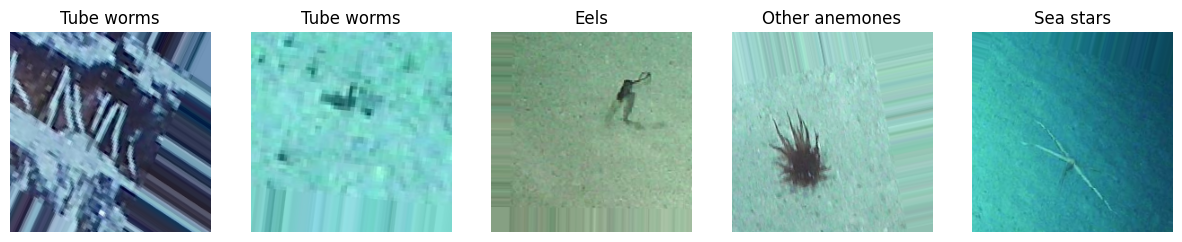

In [8]:
# Function to visualize images
def visualize_images(generator, num_images=5):
    plt.figure(figsize=(15, 5))
    class_indices = list(generator.class_indices.keys())  # Get class names

    for i in range(num_images):
        img, label = next(generator)
        class_label = class_indices[np.argmax(label[0])]  # Convert one-hot to class name
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img[0])  # Show the first image from the batch
        plt.title(class_label)  # Display the class name
        plt.axis('off')
    plt.show()

# Visualize a few images from the training set
visualize_images(train_loader, num_images=5)